In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df

Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]

In [3]:
df.shape 

(962, 2)

In [4]:
df = pd.concat([df], axis = 0 , ignore_index = True)

In [5]:
df.Category.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='Category'>

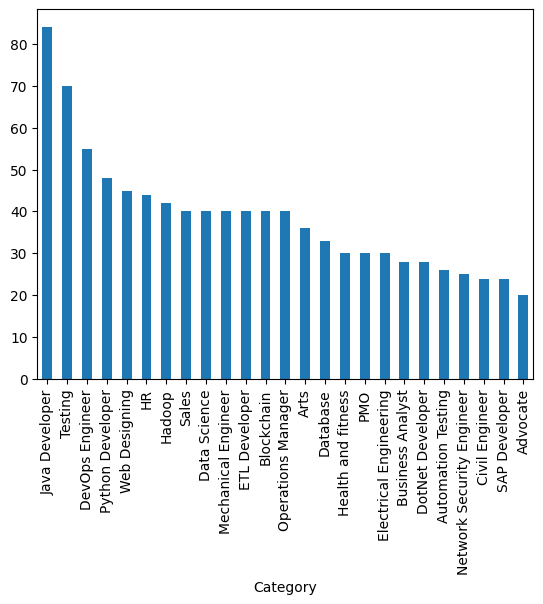

In [6]:
df.Category.value_counts().plot(kind = 'bar')

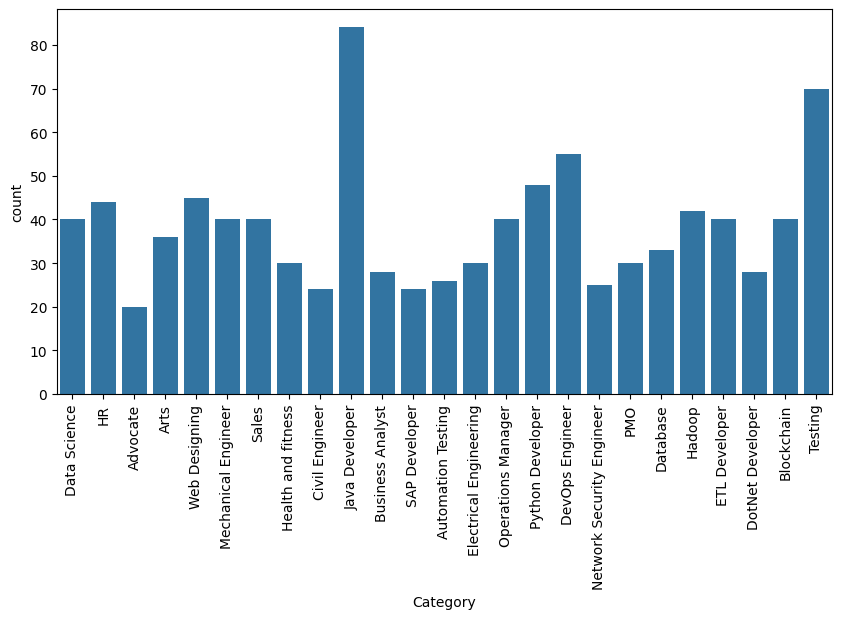

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['Category'] ) 
plt.xticks(rotation = 90)
plt.show()

In [8]:
total_categories = df['Category'].unique()
print(f'Here is the name of all categories:\n{total_categories}')
print(f'Total of all categories: {len(total_categories)}')

Here is the name of all categories:
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
Total of all categories: 25


In [9]:
value = df['Category'].value_counts()
labels  = df['Category'].unique()

plt.figure(figsize=(15,10))
plt.pie(value , labels = labels, autopct = '%1.1f%%', shadow = True, colors = plt.cm.coolwarm(np.linspace(0,1,4)) )
plt.xticks(rotation = 90)
plt.show()

In [10]:
df.duplicated().sum()

np.int64(796)

In [11]:
df.shape

(962, 2)

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(166, 2)

In [15]:
# #cleaning Data 
# 1. URLs 
# 2. Hastags 
# 3. mentions 
# 4. special character 
# 5. punctuations 

In [16]:
import re
def cleanResume(txt):
    cleantxt = re.sub('http\S+\s', ' ',txt)
    cleantxt = re.sub('@\S+', ' ',cleantxt)
    cleantxt = re.sub('#\S+\s', ' ',cleantxt)
    cleantxt = re.sub('RT|CC', ' ',cleantxt)
    cleantxt = re.sub('[%s]'% re.escape("""!"#$%&()*+<_>?:;<=>?@[\]^_'{|}~"""), ' ',cleantxt)
    cleantxt = re.sub(r'[^\x00-\x7f]', ' ',cleantxt)
    cleantxt = re.sub('\s+', ' ',cleantxt)
    return cleantxt

In [17]:
from sklearn.preprocessing import LabelEncoder 
import warnings
warnings.filterwarnings('ignore')

In [18]:
df['Resume']= df['Resume'].apply(lambda x : cleanResume(x))

In [19]:
lc = LabelEncoder()

In [20]:
lc.fit(df['Category'])

LabelEncoder()

In [21]:
df['Category']= lc.transform(df['Category'])

In [22]:
total_count = df['Category'].value_counts()
print(total_count)

Category
15    13
7     11
0     10
12    10
6     10
2      7
8      7
23     7
9      7
13     7
21     6
20     6
14     6
5      6
1      6
4      6
22     5
3      5
16     5
10     5
11     5
17     5
24     4
18     4
19     3
Name: count, dtype: int64


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [24]:
tfidf  = TfidfVectorizer(stop_words = 'english' )

In [25]:
tfidf.fit(df['Resume'])

TfidfVectorizer(stop_words='english')

In [26]:
requiredtxt=tfidf.transform(df['Resume'])

In [27]:
from sklearn.model_selection import train_test_split 

In [28]:
x_train, x_test, y_train, y_test = train_test_split( requiredtxt, df['Category'], test_size=0.2, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import  OneVsRestClassifier

from sklearn.metrics  import accuracy_score
clf = OneVsRestClassifier(KNeighborsClassifier())

In [30]:
clf.fit(x_train,y_train)
ypred= clf.predict(x_test)
print(ypred)

[19 13  2  5 11  0 20 21 23 20  6 16 12 15  0 20  7 14 19 12  4 12 12  6
  7  4 13  5 14 10 16 13 17 21]


In [31]:
print(accuracy_score(y_test, ypred))

0.8235294117647058


In [32]:
import pickle 
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [33]:
myresume= """PROFILE SUMMARY
I am a highly motivated data analyst and a proven scientist with a proven track record of results. My expertise includesdata visualization using Python (Pandas, Numpy, Matplotlib, Seaborn, Scikit-Learn), SQL, Tableau and Power BI. I havesuccessfully completed 10 Machine Learning projects, I am skilled at problem solving, data-driven decision making, andeffectively communicating actionable insights. With strong teamwork skills and efficient time management, I strive toexcel in the dynamic field of data science , data analytics and have the ability to contribute to various projects andteams.
SKILLS
Data Analyst, Data Scientist
Python(Pandas , Numpy, Matplotlib, Seaborn, Scikit-Learn) | SQL | Machine Learning | Data Visualization |Data Manipulation | Hadoop | Tableau | Deep Learning | Microsoft Power BI | Neural-Network | Excel | MS- Office | Data Analytics Tools | Computer Vission(Open CV) | Google sheet | Google Analytics | Dashboard Creation | Statistical Analysis | Data Wrangling | Data Preprocessing and Feature Engineering | Data Modeling and Evaluation | Big Data | Data Storytelling | Problem-Solving | Recommendation Engines | Communication Skill | analytical skill | critical thinking | Data-driven Decision Making | GitHub | AWS | AWS Sagemaker | AWS Quicksight
EDUCATION
Alma
Better,
Full
Stack
Data
Science
Certification
2022 – 2023
|
India
6 Month Certification Course
P
K
Roy
Memorial
Collage,
Bachelor
of
Science
2017 – 2020
|
Dhanbad,
India
Physics Honors
with
74%
marks.
Dav
Cent.
Public
School
Baniahir,
class
12th
2017
|
Dhanbad,
India
passed in
science stream
with 66% marks.
Saraswati
vidya
mandir
sindri,
class
10th
2015
|
Dhanbad,
India
Scored 84% in class 10th
PROFESSIONAL EXPERIENCE
Internship
2022
|
India
Certified Data Science virtual intern at
LetsGrowMore
,
completing a one-month internship from October 1st to November 1st, 2022.
To see certificate
Click-Here
PROJECTS
Laptop
Price
Prediction
(End
to
End
project
)
This project uses machine learning to predict prices based on laptop specifications. Data is collected through web scraping, then cleaned, and analyzed. Model selection and evaluation are done using Linear regression. A website is created for predictions using VS-Code and streamlit to make prediction on new and unseen data.
Iris
Flower
Classifier
:-
Differenciate Iris setosa , virginica and versicolor using classifier also made a Model that predicts the accuracy rate.
Stock
Market
Price
Prediction
:-
Predicted the closing price stocks using graph and linear regression.
•
House Price Prediction:-
Taken dataset from kaggle , cleaned it , performed data Analysis, using ML algorithm to predict price.
Transport
price
prediction
:-
predict the transport most of the people using to migrate in a particular area.
Ashveen Kumar Verma
Ashveen002@gmail.com
7050406853
Dhanbad
Linkedin- Ashveen_kumar_verma
Portfolio Website Link
GitHub_Ashveen
youtube Link
End
to
End
Machine
Learning:-
•
Made a full-fledged
Movie Recommendation System
and
Book Recommendation System
by collecting data on users' movie preferences, such as their names as a result it recommends five best matched using the cosine distance formula. I used Collaborative filtering which uses data from other users with similar preferences to recommend movies and Books to the user. then I converted this project into a website using Streamlit.
•
Fashion Recommendation System:
Personalized fashion suggestions using machine learning. Considers user preferences, style analysis, and collaborative filtering for accurate recommendations.
•
Breast cancer detection:
Binary classification project using Kaggle data. EDA, feature engineering, model selection, and project creation were performed.
•
SMS/ Email Spam classifier
: Using the Kaggle dataset I made an end-to-end NLP project converted it to a website using Steamlit and deployed it on the internet. To view this project
Click Here
•
Seoul Bike Demand Prediction:
I sourced a Kaggle dataset, performed EDA, and data preprocessing, and built a Random Forest ML model. I integrated this into a user interface to predict bike demand in Seoul based on user input. To view this project explanation
Click Here
•
Hotel Management System:
A Python-based Management System creates a Tkinter GUI with PIL for image handling. Featuring a header with the hotel name/logo, a menu for Customers, Room, Reports, and panels displaying hotel-related images. It handles customer info via a 'Customer' button and suggests future expansions like database integration.
•
Credit Card Fraud Detection:
This project employs Kaggle's credit card fraud dataset to implement fraud detection using logistic regression, random forest, and decision tree models. To make our models better, I used a technique called SMOTE to create more data for improved model's performance.
Business
Analyst
Projects
As a professional business analyst, I utilized
Tableau
and
Power BI
to create impactful
dashboards
for various projects. These projects included analyzing cryptocurrency,
email marketing dataset
, Global Superstore dataset,
HR dataset
,
Netflix dataset
, and the
Zomato dataset
. I employed advanced visualization techniques and Utilized DAX and Tableau tools to extract valuable insights from the data.
CERTIFICATES
python
Machine Learning
SQL
AWS Beginner
Data Analysis
Full Stack Data Science
Tableau
Excel & Advance Excel
Business Analyst
Neural Network
probability statistics
Deep Learning
Recommendation system
LANGUAGES
English
Fluent
Hindi
Fluent
INTERESTS
Computer and Internet
|
Listening To Music
|
Playing game
|
Study
SOME KEY DEFINE ME ARE:-
Effective Communication Honest & Reliable Diplomatic Logical
Thoughtful Passionate Teamwork Punctuality Time Management Multi-tasking Ability
Flexible Business Understanding
Statistical Knowledge
DECLARATION
I hereby declare that the above given information are true to the best of my knowledge. I assure you that I will put myfullest efforts to do the best
Ashveen Kumar Verma"""

In [36]:
# to see the result 

clf = pickle.load(open('clf.pkl', 'rb'))

cleanedresume = cleanResume(myresume )   # my resume avi input dena hai avi 


input_features = tfidf.transform([cleanedresume])

prediction_id = clf.predict(input_features)[0]


#map Id to category name 
'''
category_name = { 21:"Data Science", 
                31: "HR",  
                7: " Advocate'",  
                8: "Arts", 
                47: "Web Designing", 
                36: "Mechanical Engineer", 
                44: "Sales", 
                33: "Health and fitness", 
                18: "Civil Engineer", 
                35: "Java Developer", 
                14: "Business Analyst", 
                43: "SAP Developer",  
                9: "Automation Testing", 
                27: "Electrical Engineering", 
                38: "Operations Manager", 
                41: "Python Developer", 
                23: "DevOps Engineer",
                37: "Network Security Engineer", 
                39: "PMO", 
                22: "Database", 
                32: "Hadoop", 
                26: "ETL Developer", 
                24: "DotNet Developer", 
                13: "Blockchain", 
                46: "Testing", 
                19: "DESIGNER", 
                34: "INFORMATION-TECHNOLOGY", 
                45: "TEACHER",  
                1: "ADVOCATE", 
                12: "BUSINESS-DEVELOPMENT", 
                30: "HEALTHCARE", 
                29: "FITNESS",  
                2: "AGRICULTURE", 
                11: "BPO",
                42: "SALES", 
                17: "CONSULTANT", 
                20: "DIGITAL-MEDIA",  
                5: "AUTOMOBILE", 
                15: "CHEF", 
                28: "FINANCE",  
                3: "APPAREL", 
                25: "ENGINEERING",  
                0: "ACCOUNTANT", 
                16: "CONSTRUCTION", 
                40: "PUBLIC-RELATIONS", 
                10: "BANKING", 
                4: "ARTS",  
                6: "AVIATION"
    
}
'''

category_name = df['Category']

category_name2 = category_name.get(prediction_id)
#print(prediction_id)
print('Predicted category is:  ', category_name2)

Predicted category is:   6


In [63]:
#final step above 